# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | kangding
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | kamyshin
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | arar
Processing Record 9 of Set 1 | arno
Processing Record 10 of Set 1 | luanco
Processing Record 11 of Set 1 | paita
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | kristiansund
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | ternate
Processing Record 17 of Set 1 | karratha
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | thinadhoo
Processing Record 21 of Set 1 | enewetak
Processing Record 22 of Set 1 | vansada
Processing Record 23 of Set 1 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,23.59,62,94,11.71,PN,1711848548
1,grytviken,-54.2811,-36.5092,0.37,81,23,5.48,GS,1711848548
2,whitehorse,60.7161,-135.0538,5.01,50,100,2.24,CA,1711848548
3,al jawf,29.5000,38.7500,12.54,73,0,2.62,SA,1711848548
4,bethel,41.3712,-73.4140,13.20,31,100,2.06,US,1711848548


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,23.59,62,94,11.71,PN,1711848548
1,grytviken,-54.2811,-36.5092,0.37,81,23,5.48,GS,1711848548
2,whitehorse,60.7161,-135.0538,5.01,50,100,2.24,CA,1711848548
3,al jawf,29.5000,38.7500,12.54,73,0,2.62,SA,1711848548
4,bethel,41.3712,-73.4140,13.20,31,100,2.06,US,1711848548


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

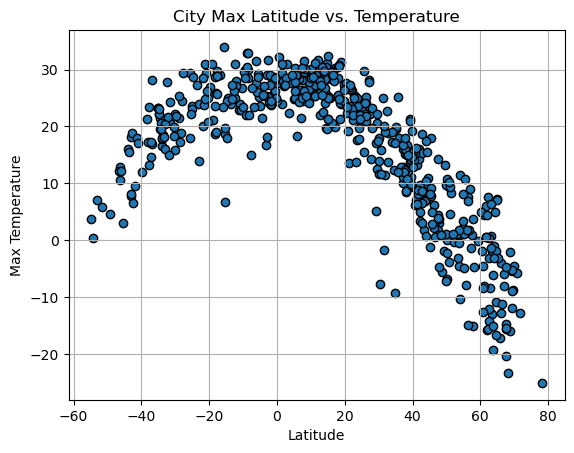

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Humidity

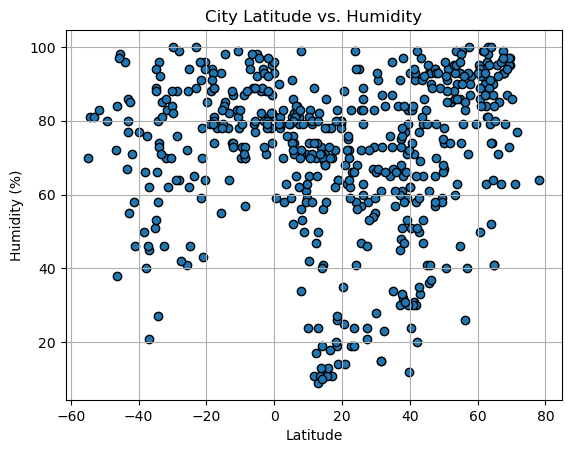

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Cloudiness

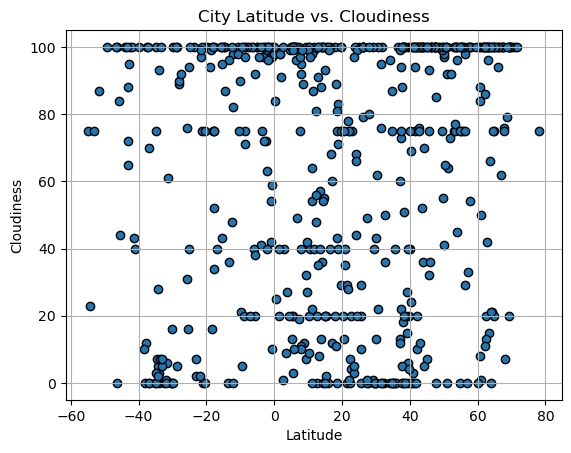

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

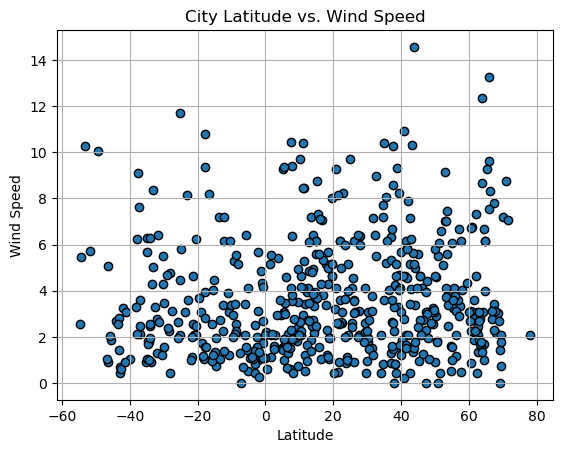

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.grid()
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")
    return line_eq

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,whitehorse,60.7161,-135.0538,5.01,50,100,2.24,CA,1711848548
3,al jawf,29.5000,38.7500,12.54,73,0,2.62,SA,1711848548
4,bethel,41.3712,-73.4140,13.20,31,100,2.06,US,1711848548
6,tindouf,27.6711,-8.1474,14.25,58,0,2.06,DZ,1711848548
12,bilibino,68.0546,166.4372,-23.33,79,7,2.15,RU,1711848549


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,23.59,62,94,11.71,PN,1711848548
1,grytviken,-54.2811,-36.5092,0.37,81,23,5.48,GS,1711848548
5,puerto ayora,-0.7393,-90.3518,25.86,95,97,2.68,EC,1711848548
7,blackmans bay,-43.0167,147.3167,18.18,77,65,0.45,AU,1711848548
8,invercargill,-46.4000,168.3500,12.79,84,100,0.89,NZ,1711848549


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.908215839405253


Text(0.5, 0, 'Latitude')

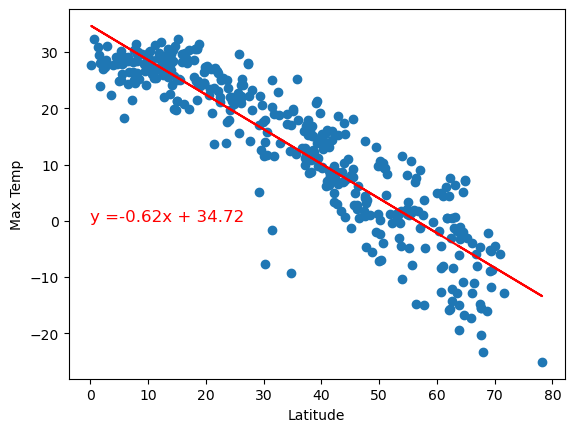

In [20]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (0, 0))
plt.xlabel("Latitude")

The r-value is: 0.6989457561214032


Text(0.5, 0, 'Latitude')

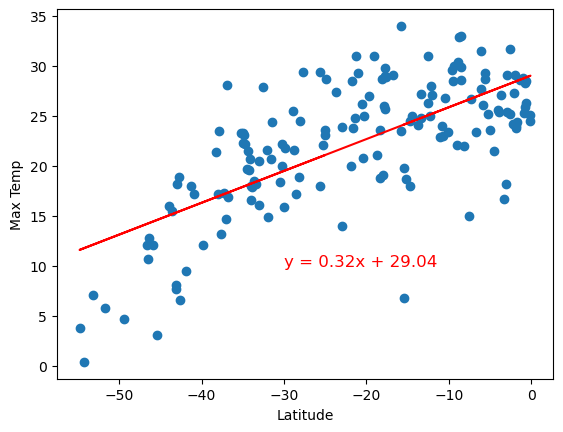

In [26]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-30, 10))
plt.xlabel("Latitude")

**Discussion about the linear relationship:**

    - Negative correlation between temperature and latitude with a correlation coefficient of '-0.908215839405253' on Northern Hemisphere.
    - Positive correlation between temperature and latitude with a correlation coefficient of '0.6989457561214032' on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3159223409537744


Text(0.5, 0, 'Latitude')

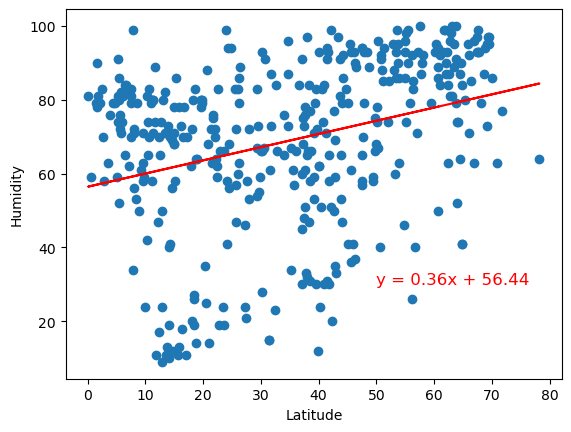

In [29]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (50, 30))
plt.xlabel("Latitude")

The r-value is: 0.32422735504289646


Text(0.5, 0, 'Latitude')

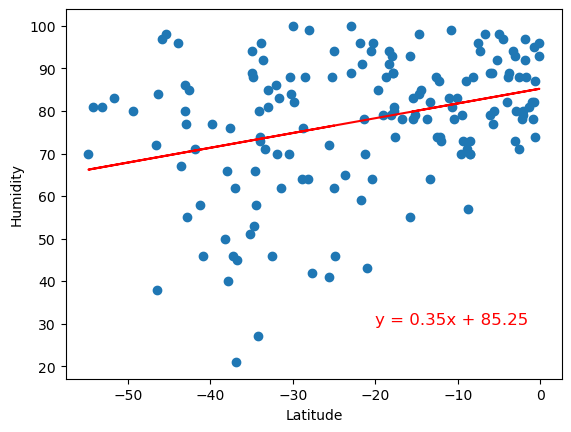

In [28]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-20, 30))
plt.xlabel("Latitude")

**Discussion about the linear relationship:**

    - Positive correlation between Humidity and latitude with a correlation coefficient of '0.3159223409537744' on Northern Hemisphere.
    - Positive correlation between Humidity and latitude with a correlation coefficient of '0.32422735504289646' on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2010826465596639


Text(0.5, 0, 'Latitude')

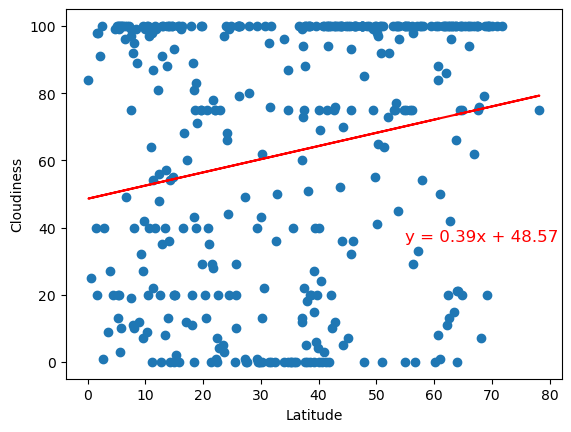

In [34]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (55, 36))
plt.xlabel("Latitude")

The r-value is: 0.2420635492784538


Text(0.5, 0, 'Latitude')

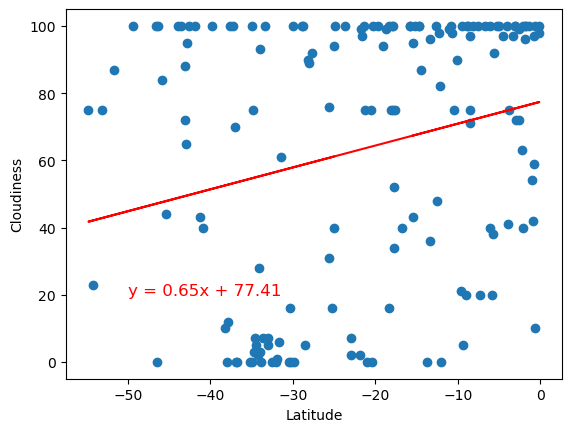

In [35]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-50, 20))
plt.xlabel("Latitude")

**Discussion about the linear relationship:**

    - Positive correlation between Humidity and latitude with a correlation coefficient of '0.2010826465596639' on Northern Hemisphere.
    - Positive correlation between Humidity and latitude with a correlation coefficient of '0.2420635492784538' on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04180886963030445


Text(0.5, 0, 'Latitude')

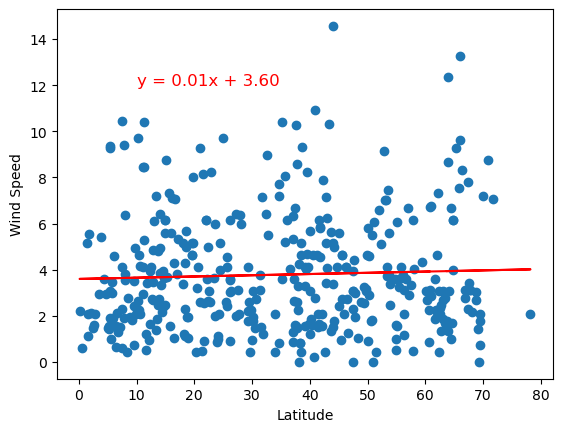

In [37]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (10, 12))
plt.xlabel("Latitude")

The r-value is: -0.1794883548329847


Text(0.5, 0, 'Latitude')

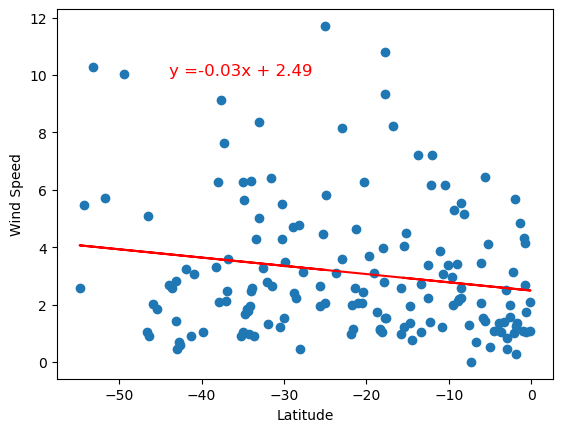

In [38]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-44, 10))
plt.xlabel("Latitude")

**Discussion about the linear relationship:**

    - Positive correlation between Humidity and latitude with a correlation coefficient of '0.04180886963030445' on Northern Hemisphere.
    - Negative correlation between Humidity and latitude with a correlation coefficient of '-0.1794883548329847' on Southern Hemisphere.